<a href="https://colab.research.google.com/github/Abdel-Moussaoui/Auto-Encoders/blob/master/convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 11s - loss: 0.2030 - val_loss: 0.1626
Epoch 2/50
 - 4s - loss: 0.1516 - val_loss: 0.1412
Epoch 3/50
 - 4s - loss: 0.1374 - val_loss: 0.1360
Epoch 4/50
 - 5s - loss: 0.1303 - val_loss: 0.1267
Epoch 5/50
 - 5s - loss: 0.1255 - val_loss: 0.1231
Epoch 6/50
 - 4s - loss: 0.1220 - val_loss: 0.1203
Epoch 7/50
 - 5s - loss: 0.1197 - val_loss: 0.1184
Epoch 8/50
 - 4s - loss: 0.1175 - val_loss: 0.1150
Epoch 9/50
 - 5s - loss: 0.1158 - val_loss: 0.1142
Epoch 10/50
 - 5s - loss: 0.1146 - val_loss: 0.1128
Epoch 11/50
 - 4s - loss: 0.1134 - val_loss: 0.1108
Epoch 12/50
 - 5s - loss: 0.1124 - val_loss: 0.1102
Epoch 13/50
 - 4s - loss: 0.1116 - val_loss: 0.1074
Epoch 14/50
 - 4s - loss: 0.1109 - val_loss: 0.1067
Epoch 15/50
 - 4s - loss: 0.1101 - val_loss: 0.1092
Epoch 16/50
 - 5s - loss: 0.1095 - val_loss: 0.1124
Epoch 17/50
 - 5s - loss: 0.1091 - val_loss: 0.1087
Epoch 18/

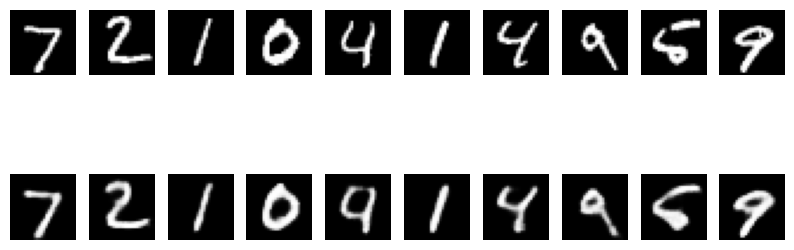

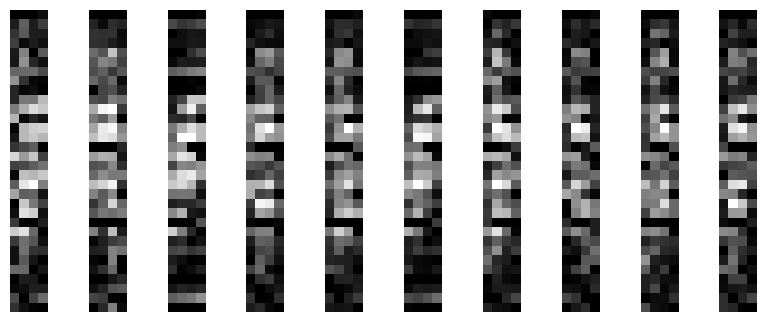

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

input_img = Input(shape=(28, 28, 1))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8), i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# To train it, use the original MNIST digits with shape (samples, 3, 28, 28),
# and just normalize pixel values between 0 and 1

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))    # adapt this if using 'channels_first' image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))       # adapt this if using 'channels_first' image data format

# open a terminal and start TensorBoard to read logs in the autoencoder subdirectory
# tensorboard --logdir=autoencoder

autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='conv_autoencoder')], verbose=2)

# take a look at the reconstructed digits
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

# take a look at the 128-dimensional encoded representation
# these representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('conv_autoe_features.pickle', 'wb'))

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()
